In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from dateutil import parser

In [2]:
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Im
print("ScikitLearn Libraries Loaded")

ScikitLearn Libraries Loaded


In [4]:
data = './diabetes.csv'

In [5]:
df = pd.read_csv(data)

In [6]:
df.shape

(768, 9)

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Data do not have null but still have Zeros in multiple place. Need to replace with data by imputation

In [9]:
#Corelation Matrix

corrmat = df.corr()

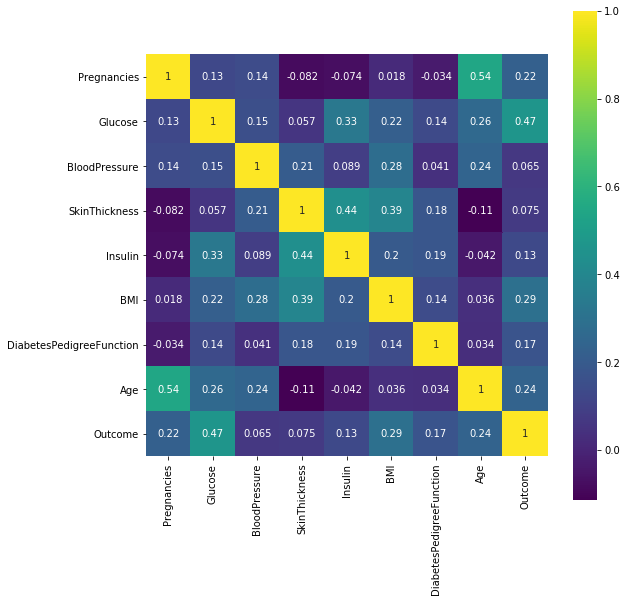

In [10]:
fig = plt.figure(figsize=(9,9))
sns.heatmap(corrmat,square = True,annot=True,cmap='viridis')
plt.show()

No such high correlation between data

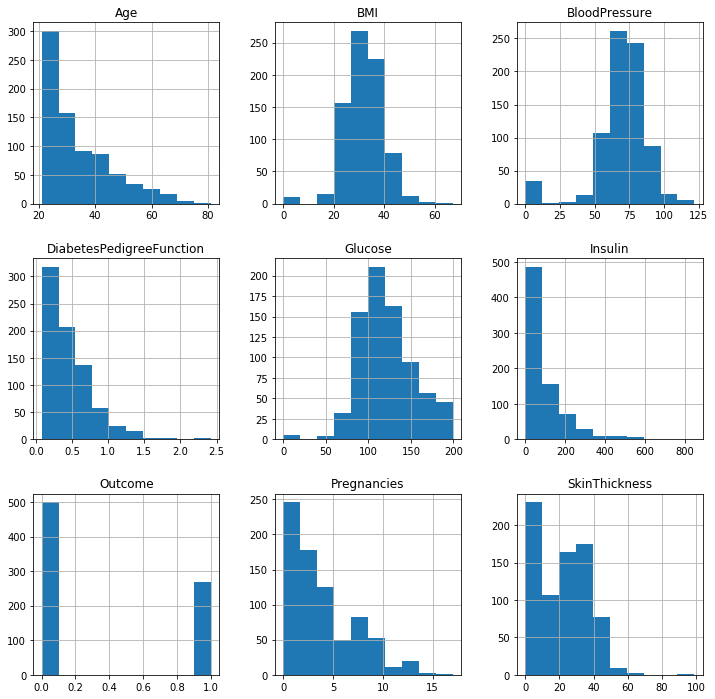

In [11]:
df.hist(figsize=(12,12))
plt.show()

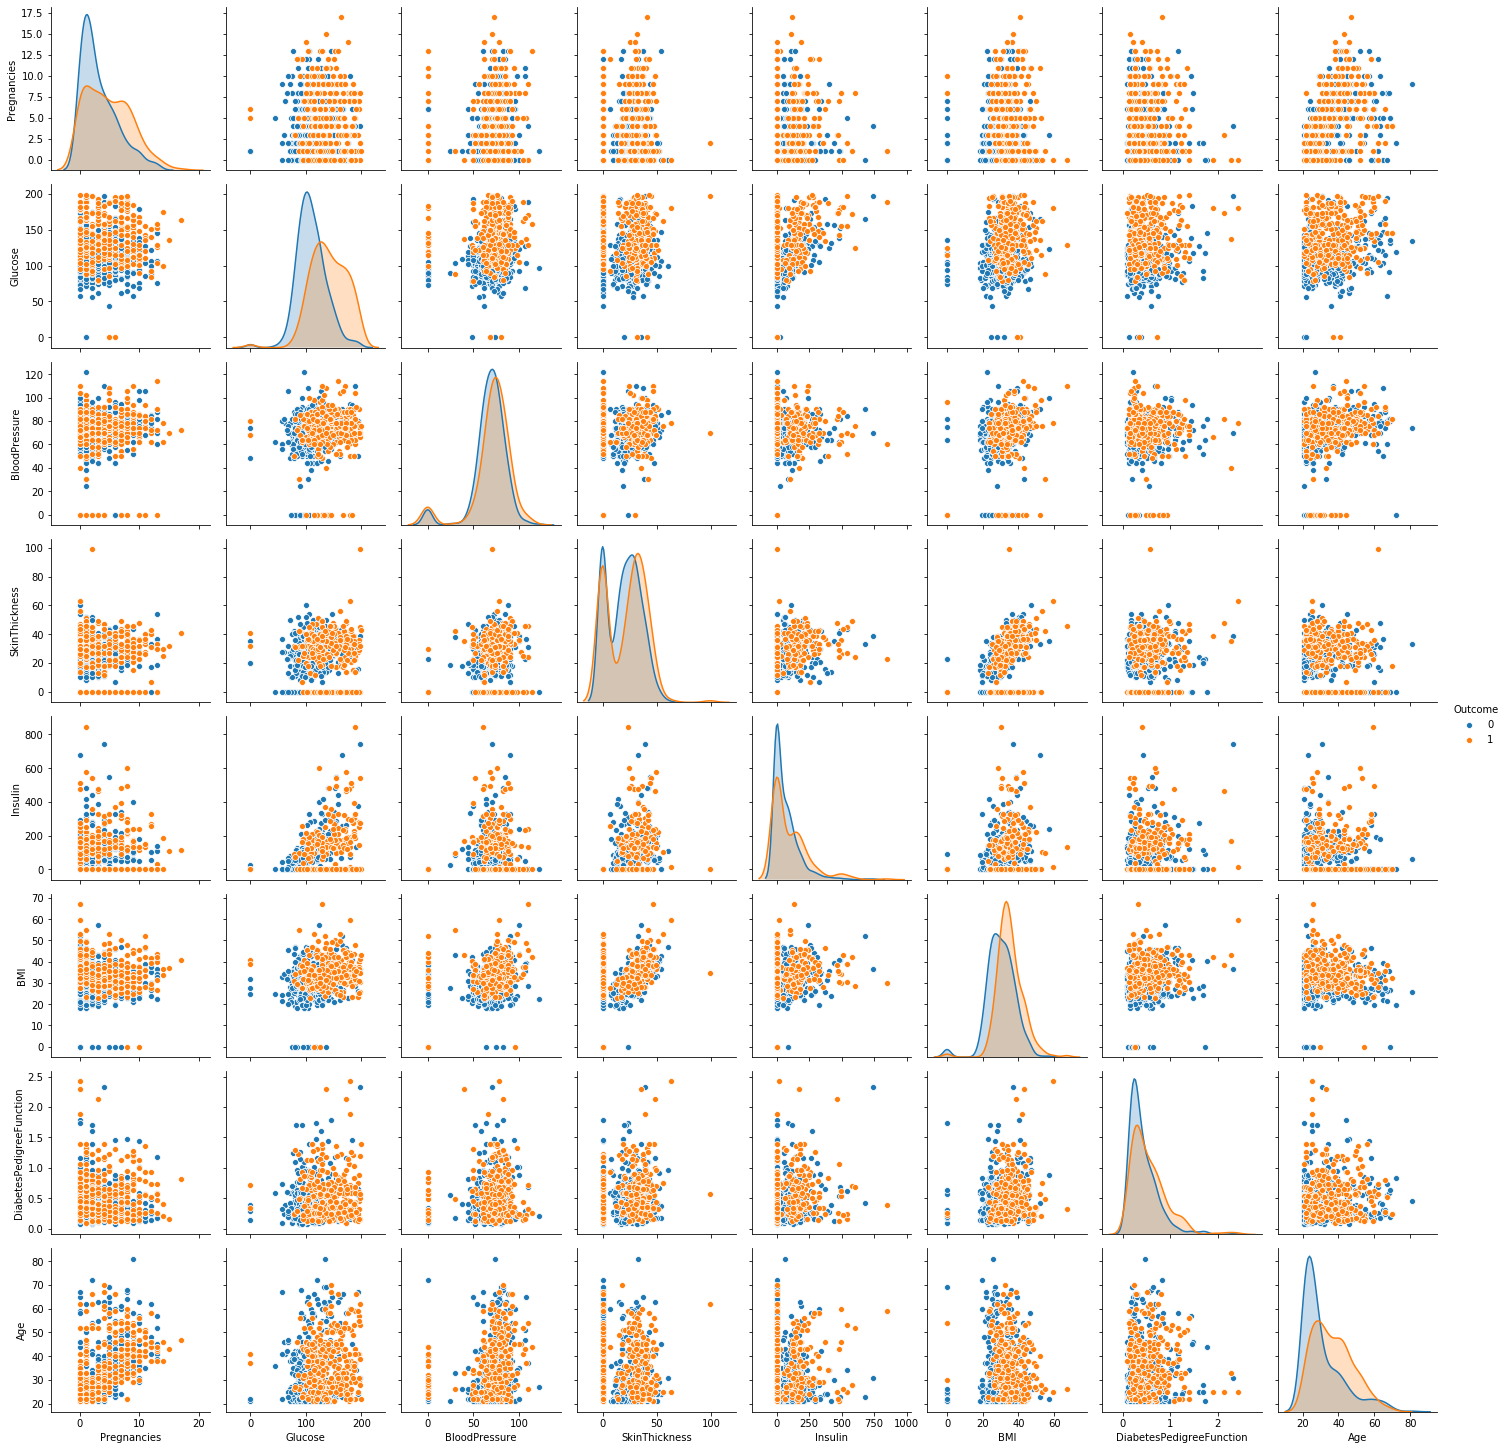

In [12]:
sns.pairplot(df,hue = 'Outcome')

# Feature Engineering

In [13]:
#Check for Unbalance 
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#Check for data having 0 in the columns, will assume this data as equal as NULL

In [14]:
print('Row in the dataframe {}'.format(len(df)) )
print('-------------------------------------------------------')
print('row missing in Glucose : {0}'. format(len(df.loc[df.Glucose == 0])))

print('row missing in Glucose : {0}'. format(len(df.loc[df.Glucose == 0])))
print('row missing in BloodPressure : {0}'. format(len(df.loc[df.BloodPressure == 0])))
print('row missing in SkinThickness : {0}'. format(len(df.loc[df.SkinThickness == 0])))
print('row missing in BMI : {0}'. format(len(df.loc[df.BMI == 0])))
print('row missing in Age : {0}'. format(len(df.loc[df.Age == 0])))
print('row missing in Insulin : {0}'. format(len(df.loc[df.Insulin == 0])))
print('row missing in Pregnencies : {0}'. format(len(df.loc[df.Pregnancies == 0])))

Row in the dataframe 768
-------------------------------------------------------
row missing in Glucose : 5
row missing in Glucose : 5
row missing in BloodPressure : 35
row missing in SkinThickness : 227
row missing in BMI : 11
row missing in Age : 0
row missing in Insulin : 374
row missing in Pregnencies : 111


###### Zeros in the data, or in Medical data may be misleading. Deletion wont help. Lets impute the data. Divide the data first and then impute.

In [15]:

X = df.drop('Outcome', axis = 1) # predictor features columns
y = df.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)


In [21]:
from sklearn.impute import SimpleImputer

In [23]:
fill = SimpleImputer(missing_values=0,strategy='mean')

X_train = fill.fit_transform(X_train)
X_test  = fill.fit_transform(X_test)

In [24]:
def FitModel(X_train,y_train,X_test,y_test,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
    grid = GridSearchCV(
    estimator = algorithm,
    param_grid = gridSearchParams,
    cv = cv,
    scoring= 'accuracy',
    verbose = 1,
    n_jobs = -1
    )
    grid_result = grid.fit(X_train,y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict(X_test)
    cm = confusion_matrix(y_test,pred)
    print(pred)
    print('Best Params',best_params)
    print('Classification Report ',classification_report(y_test,pred))
    print('Accuracy Score',str(accuracy_score(y_test,pred)))
    print('Confusion Matrix',cm)

# Logistic Regression

In [28]:
penalty = ['l1','l2']

C = np.logspace(0, 4, 10)

hyperparameters = dict(C=C, penalty = penalty)

FitModel(X_train,y_train,X_test,y_test,'LogisticRegression',LogisticRegression(),hyperparameters,cv =5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1
 1 0 0 0 1 0]
Best Params {'C': 7.742636826811269, 'penalty': 'l2'}
Classification Report                precision    recall  f1-score   support

           0       0.73      0.88      0.80        95
           1       0.72      0.47      0.57        59

    accuracy                           0.73       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.73      0.71       154

Accuracy Score 0.7272727272727273
Confusion Matrix [[84 11]
 [31 28]]


[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
C:\Users\SB250122\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Random Forest Classifier

In [29]:
param = { 
    
    'n_estimators' : [100, 500, 1000, 1500, 2000]

      }


FitModel(X_train,y_train,X_test,y_test,'RandomForrest',RandomForestClassifier(),param,cv =5)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    9.2s finished


[1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 1 0 0 0 1 0]
Best Params {'n_estimators': 500}
Classification Report                precision    recall  f1-score   support

           0       0.73      0.86      0.79        95
           1       0.68      0.47      0.56        59

    accuracy                           0.71       154
   macro avg       0.70      0.67      0.67       154
weighted avg       0.71      0.71      0.70       154

Accuracy Score 0.7142857142857143
Confusion Matrix [[82 13]
 [31 28]]


# Support Vector Machine

In [30]:
param = {
    
    'C' : [0.1,1,100,1000],
    'gamma' : [0.0001,0.001,0.005,0.1,1,3,5]
}

FitModel(X_train,y_train,X_test,y_test,'SVM',SVC(),param,cv =5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s


[1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0
 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1
 1 0 0 0 0 0]
Best Params {'C': 1, 'gamma': 0.0001}
Classification Report                precision    recall  f1-score   support

           0       0.71      0.91      0.80        95
           1       0.73      0.41      0.52        59

    accuracy                           0.71       154
   macro avg       0.72      0.66      0.66       154
weighted avg       0.72      0.71      0.69       154

Accuracy Score 0.7142857142857143
Confusion Matrix [[86  9]
 [35 24]]


[Parallel(n_jobs=-1)]: Done 125 out of 140 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.5s finished


##### Model is baised towards the majority class, Model is more 'skewed' towards the 0 class

In [31]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [33]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X,y)
pd.Series(Y_res).value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_res, Y_res, test_size = 0.20, random_state = 10)

In [35]:
fill = SimpleImputer(missing_values=0,strategy='mean')

X_train = fill.fit_transform(X_train)
X_test  = fill.fit_transform(X_test)

# Logistic Regression - After OverSampling

In [36]:
penalty = ['l1','l2']

C = np.logspace(0, 4, 10)

hyperparameters = dict(C=C, penalty = penalty)

FitModel(X_train,y_train,X_test,y_test,'LogisticRegression',LogisticRegression(),hyperparameters,cv =5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    3.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished


[1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0
 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0
 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0
 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0]
Best Params {'C': 1291.5496650148827, 'penalty': 'l2'}
Classification Report                precision    recall  f1-score   support

           0       0.70      0.78      0.74        93
           1       0.79      0.70      0.74       107

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200

Accuracy Score 0.74
Confusion Matrix [[73 20]
 [32 75]]


C:\Users\SB250122\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#####  Now the precision and recall has been imporoved

# Random Forest - After OverSampling

In [38]:
param = { 
    
    'n_estimators' : [100, 500, 1000, 1500, 2000]

      }


FitModel(X_train,y_train,X_test,y_test,'RandomForrest',RandomForestClassifier(),param,cv =5)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   14.5s finished


[1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1
 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0
 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0
 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0]
Best Params {'n_estimators': 500}
Classification Report                precision    recall  f1-score   support

           0       0.84      0.80      0.82        93
           1       0.83      0.87      0.85       107

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200

Accuracy Score 0.835
Confusion Matrix [[74 19]
 [14 93]]


# SVM - After OverSampling

In [39]:
param = {
    
    'C' : [0.1,1,100,1000],
    'gamma' : [0.0001,0.001,0.005,0.1,1,3,5]
}

FitModel(X_train,y_train,X_test,y_test,'SVM',SVC(),param,cv =5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s


[1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1
 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0
 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0
 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1
 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0]
Best Params {'C': 1000, 'gamma': 0.005}
Classification Report                precision    recall  f1-score   support

           0       0.69      0.81      0.75        93
           1       0.80      0.69      0.74       107

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.74       200
weighted avg       0.75      0.74      0.74       200

Accuracy Score 0.745
Confusion Matrix [[75 18]
 [33 74]]


[Parallel(n_jobs=-1)]: Done 125 out of 140 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.0s finished
